In [1]:
# auto reload
%load_ext autoreload
%autoreload 2
import sys
import os
sys.path.append(os.path.abspath(os.getcwd()))
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))
from onpolicy.scripts.eval_mpe import eval_pipeline 
import matplotlib.pyplot as plt

In [2]:



def test_observation_noise_policy(obs_noise_levels, model_path, episodes=25):
    """Test how observation noise affects agent observations"""
    results = {}
    
    for noise_level in obs_noise_levels:

        r, frac, s_rates, n_collisions = eval_pipeline(["--model_dir", model_path, "--env_name", "NoisyGraphMPE", \
                                       "--render_episodes", str(episodes), \
                                        "--obs_noise_level", str(noise_level), "--dyn_noise_level", "0.0"])
        results[noise_level] = {
            'rewards': r,
            'success_rates': s_rates,
            'num_collisions': n_collisions,
            'frac_episode': frac
        }
    return results

def test_dynamics_noise_policy(dyn_noise_levels,model_path, episodes=25):
    """Test how observation noise affects agent observations"""
    results = {}
    
    for noise_level in dyn_noise_levels:

        r, frac, s_rates, n_collisions = eval_pipeline(["--model_dir", model_path, "--env_name", "NoisyGraphMPE", \
                                       "--render_episodes", str(episodes), \
                                        "--obs_noise_level", "0.0", "--dyn_noise_level", str(noise_level)])
        results[noise_level] = {
            'rewards': r,
            'success_rates': s_rates,
            'num_collisions': n_collisions,
            'frac_episode': frac
        }
    return results


def plot_results_policy(obs_results, dyn_results, baseline, title = ""):
    """Plot the results of noise testing"""
    fig, axs = plt.subplots(2, 4, figsize=(15, 10))
    
    # Plot observation noise results
    obs_levels = sorted(obs_results.keys())
    rewards = [obs_results[l]['rewards'] for l in obs_levels]
    success_rates = [obs_results[l]['success_rates'] for l in obs_levels]
    num_collisions = [obs_results[l]['num_collisions'] for l in obs_levels]
    frac_episode = [obs_results[l]['frac_episode'] for l in obs_levels]
    
    # plot baseline as horizontal line doted red
    axs[0, 0].axhline(baseline['rewards'], color='red', linestyle='--',alpha=0.5 , label='Baseline')
    axs[0, 1].axhline(baseline['success_rates'], color='red', linestyle='--',alpha=0.5)
    axs[0, 2].axhline(baseline['num_collisions'], color='red', linestyle='--',alpha=0.5)
    axs[0, 3].axhline(baseline['frac_episode'], color='red', linestyle='--',alpha=0.5)


    axs[0, 0].plot(obs_levels, rewards, 'o-')
    axs[0, 0].set_title('Rewards')
    axs[0, 0].set_xlabel('Obs Noise Level (std)')
    axs[0, 0].set_ylabel('Average Rewards')
    
    axs[0, 1].plot(obs_levels, success_rates, 'o-')
    axs[0, 1].set_title('Success Rates')
    axs[0, 1].set_xlabel('Obs Noise Level (std)')
    axs[0, 1].set_ylabel('Average Success Rates')
    
    axs[0, 2].plot(obs_levels, num_collisions, 'o-')
    axs[0, 2].set_title('Number of Collisions')
    axs[0, 2].set_xlabel('Obs Noise Level (std)')
    axs[0, 2].set_ylabel('Average Number of Collisions')
    
    axs[0, 3].plot(obs_levels, frac_episode, 'o-')
    axs[0, 3].set_title('Fraction of Episode')
    axs[0, 3].set_xlabel('Obs Noise Level (std)')
    axs[0, 3].set_ylabel('Average Fraction of Episode')

    # Plot dynamics noise results
    dyn_levels = sorted(dyn_results.keys())
    rewards = [dyn_results[l]['rewards'] for l in dyn_levels]
    success_rates = [dyn_results[l]['success_rates'] for l in dyn_levels]
    num_collisions = [dyn_results[l]['num_collisions'] for l in dyn_levels]
    frac_episode = [dyn_results[l]['frac_episode'] for l in dyn_levels]


    # plot baseline as horizontal line doted red
    axs[1, 0].axhline(baseline['rewards'], color='red', linestyle='--',alpha=0.5 , label='Baseline')
    axs[1, 1].axhline(baseline['success_rates'], color='red', linestyle='--',alpha=0.5)
    axs[1, 2].axhline(baseline['num_collisions'], color='red', linestyle='--',alpha=0.5)
    axs[1, 3].axhline(baseline['frac_episode'], color='red', linestyle='--',alpha=0.5)
    
    axs[1, 0].plot(dyn_levels, rewards, 'o-')
    axs[1, 0].set_title('Rewards')
    axs[1, 0].set_xlabel('Dyn Noise Level (std)')
    axs[1, 0].set_ylabel('Average Rewards')
    
    axs[1, 1].plot(dyn_levels, success_rates, 'o-')
    axs[1, 1].set_title('Success Rates')
    axs[1, 1].set_xlabel('Dyn Noise Level (std)')
    axs[1, 1].set_ylabel('Average Success Rates')

    axs[1, 2].plot(dyn_levels, num_collisions, 'o-')
    axs[1, 2].set_title('Number of Collisions')
    axs[1, 2].set_xlabel('Dyn Noise Level (std)')
    axs[1, 2].set_ylabel('Average Number of Collisions')
    
    axs[1, 3].plot(dyn_levels, frac_episode, 'o-')
    axs[1, 3].set_title('Fraction of Episode')
    axs[1, 3].set_xlabel('Dyn Noise Level (std)')
    axs[1, 3].set_ylabel('Average Fraction of Episode') 
    # add legend
    axs[0, 0].legend()
    axs[1, 0].legend()
    
    
    plt.tight_layout()
    plt.savefig(f'noise_analysis_{title}.png')
    plt.show()



Testing observation noise levels...
__________________________________________________
Using dyn_noise_level = 0.0
Using env_name = NoisyGraphMPE
Using model_dir = ../onpolicy/results/GraphMPE/navigation_graph/rmappo/MAPPO_5/wandb/latest-run/files
Using obs_noise_level = 0.1
Using render_episodes = 20
Using save_gifs = False
__________________________________________________
Overriding Observation dimension
Overriding Observation dimension
Restoring from checkpoint stored in ../onpolicy/results/GraphMPE/navigation_graph/rmappo/MAPPO_5/wandb/latest-run/files


/home/ubuntu/marl/RobustMARL/onpolicy/algorithms/graph_mappo.py:53: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  self.scaler = amp.GradScaler()


[-2.3333319201514726, 9.550905513817632, 62.35376214620125, 59.52863460821997, 49.33967579312896, -35.92787150817081, -26.71995536608886, -49.36698021357766, 47.6438242644304, 61.26422392674034, 37.78562194896101, 62.78449849519584, 14.14653706482106, 126.46056910502944, 71.2580641638105, -6.976983968263878, 58.57244127740264, 28.22805892236439, 1.940375766409618, 102.994809892952]
[0.592, 0.6880000000000001, 0.44799999999999995, 0.32799999999999996, 0.5519999999999999, 0.6319999999999999, 0.608, 0.6799999999999999, 0.544, 0.512, 0.608, 0.352, 0.5760000000000001, 0.28800000000000003, 0.656, 0.7120000000000001, 0.512, 0.5599999999999999, 0.656, 0.52]
[True, True, False, True, True, True, True, False, True, True, True, True, False, True, True, False, True, True, False, True]
[7.0, 1.0, 2.0, 7.0, 1.0, 11.0, 12.0, 13.0, 7.0, 6.0, 4.0, 7.0, 8.0, 0.0, 1.0, 8.0, 3.0, 3.0, 5.0, 0.0]
rewards: 33.62634399566162
frac_episode: 0.5512
success_rates: 0.75
num_collisions: 5.3
Testing dynamics noise l

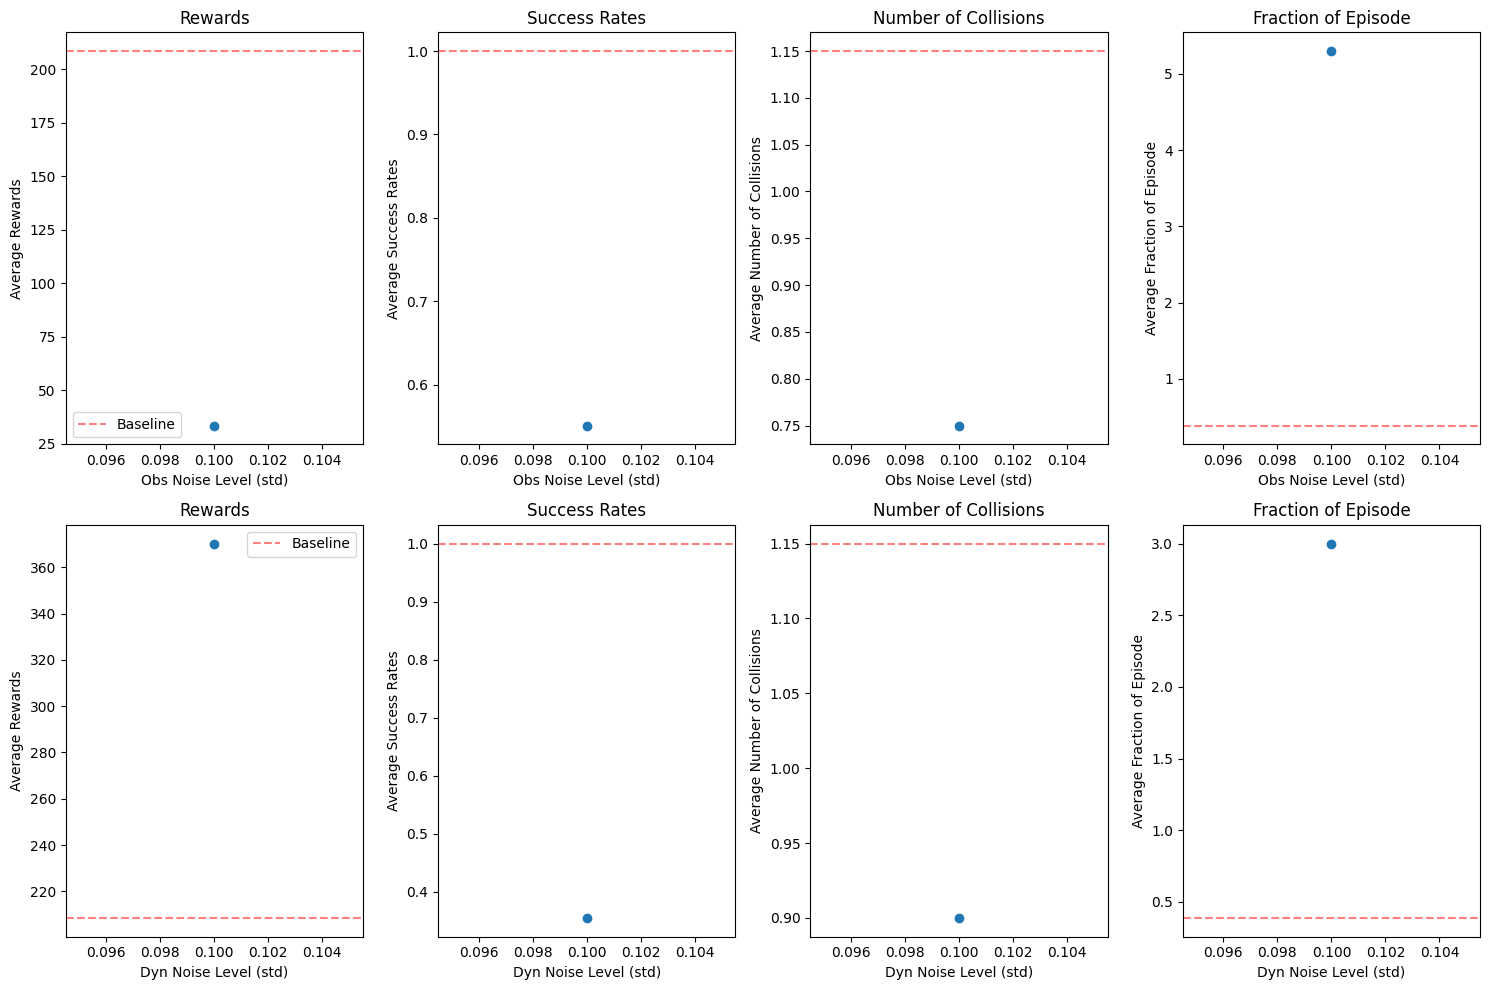

In [12]:
# Test various noise levels
obs_noise_levels = [0.1]
dyn_noise_levels = [0.1]

print("Testing observation noise levels...")
obs_results = test_observation_noise_policy(obs_noise_levels, episodes=20)

print("Testing dynamics noise levels...")
dyn_results = test_dynamics_noise_policy(dyn_noise_levels, episodes=20)
plot_results_policy(obs_results, dyn_results)


Testing observation noise levels...
__________________________________________________
Using env_name = NoisyGraphMPE
Using model_dir = ../onpolicy/results/GraphMPE/navigation_graph/rmappo/MAPPO_3/wandb/latest-run/files
Using render_episodes = 50
Using save_gifs = False
__________________________________________________
Overriding Observation dimension
Overriding Observation dimension
Restoring from checkpoint stored in ../onpolicy/results/GraphMPE/navigation_graph/rmappo/MAPPO_3/wandb/latest-run/files
[168.1455459700918, 264.6342119436945, 171.2188698958016, 157.51962958464532, 144.91878279013667, 265.7518698330227, 207.05065020713207, 203.06612605731547, 225.54489857815258, 170.17152423576874, 207.614459531114, 109.64891647494449, 190.12601514646508, 222.98240445109514, 185.01945316781382, 214.63275286486285, 241.38230776291388, 232.97903634694134, 144.2949203658996, 191.5640316273622, 208.65257685456945, 144.07146966391463, 217.12656435608116, 139.29087261844936, 136.37714695880436,

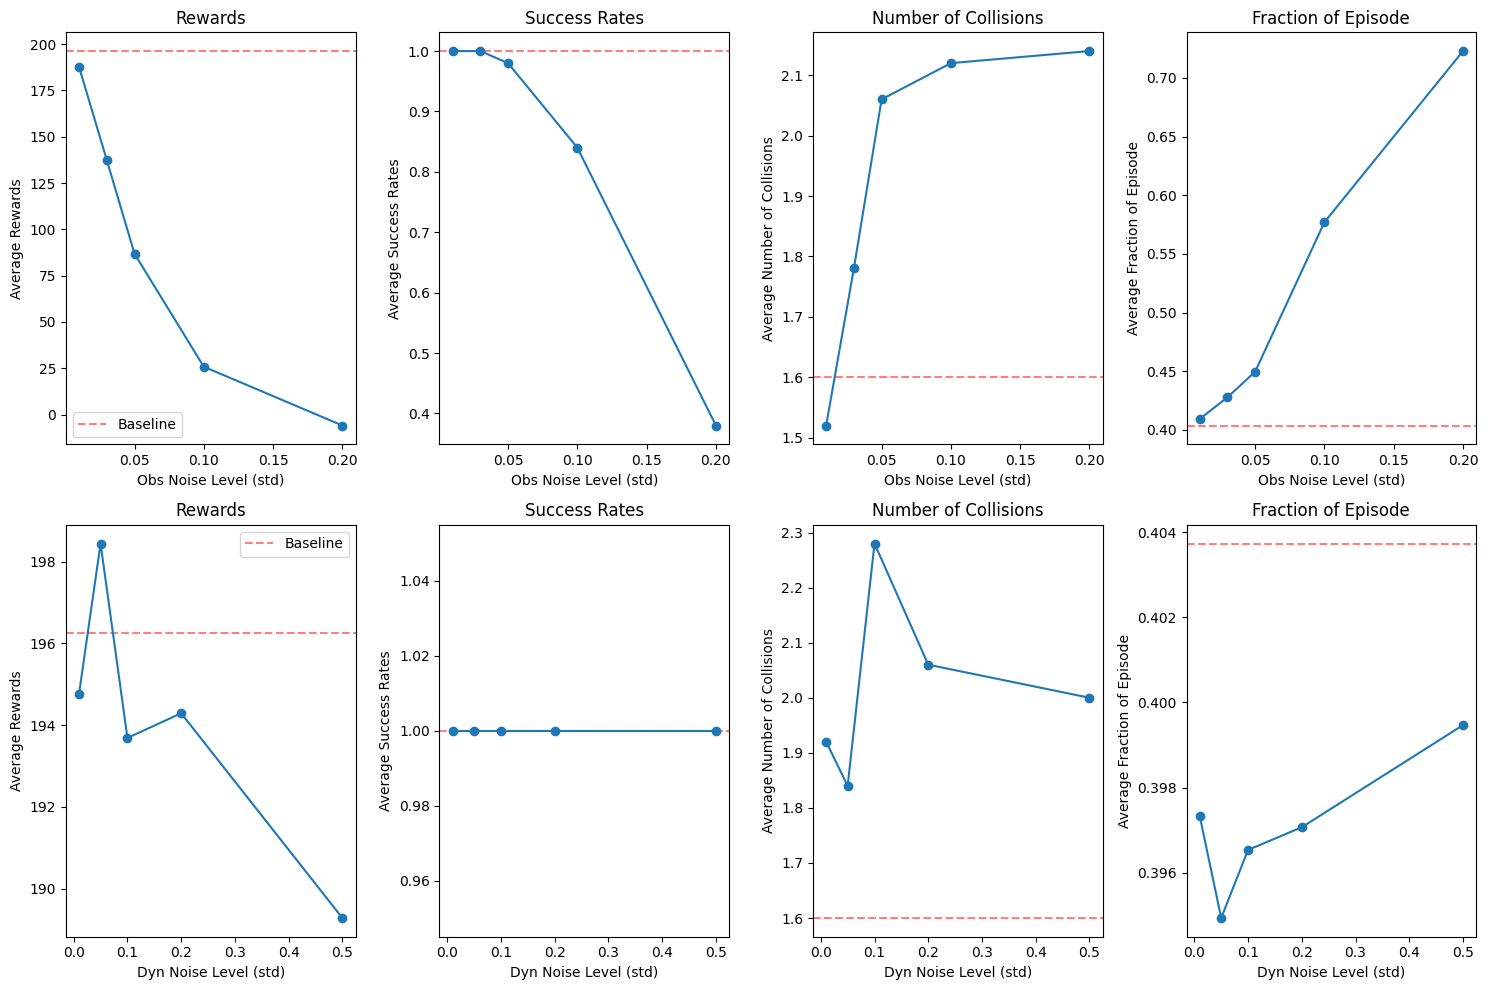

In [16]:
# 3 agents
model_path = "../onpolicy/results/GraphMPE/navigation_graph/rmappo/MAPPO_3/wandb/latest-run/files"

    
# Test various noise levels
obs_noise_levels = [0.01, 0.03, 0.05, 0.1, 0.2]
dyn_noise_levels = [0.01, 0.05, 0.1, 0.2, 0.5]

print("Testing observation noise levels...")
obs_results = test_observation_noise_policy(obs_noise_levels,model_path, episodes=50)

print("Testing dynamics noise levels...")
dyn_results = test_dynamics_noise_policy(dyn_noise_levels, model_path, episodes=50)

#run baselines
r, frac, s_rates, n_collisions = eval_pipeline(["--model_dir", model_path, "--env_name", "GraphMPE", \
                                "--render_episodes", "50"])
baseline = {"rewards": r, "success_rates": s_rates, "num_collisions": n_collisions, "frac_episode": frac}

plot_results_policy(obs_results, dyn_results, baseline, "3agents")

Testing observation noise levels...
__________________________________________________
Using env_name = NoisyGraphMPE
Using model_dir = ../onpolicy/results/GraphMPE/navigation_graph/rmappo/MAPPO_5/wandb/run-20250312_060957-7h0hpvrb/files
Using render_episodes = 50
Using save_gifs = False
__________________________________________________
Overriding Observation dimension
Overriding Observation dimension
Restoring from checkpoint stored in ../onpolicy/results/GraphMPE/navigation_graph/rmappo/MAPPO_5/wandb/run-20250312_060957-7h0hpvrb/files
[335.39088390656184, 191.64842642423088, 415.3857430765771, 438.22228911289557, 418.13854981728, 275.34628493184016, 264.51408968103965, 282.4062150380231, 364.94427854648603, 367.4972374614925, 243.89070047462306, 471.2543441771676, 330.70381491204654, 458.58981159276374, 346.8645891100358, 371.5065557337746, 386.7757427792606, 300.61902544597734, 239.55667850512145, 378.5535289253716, 301.485316584079, 417.9123278919812, 329.3189651183433, 386.207582

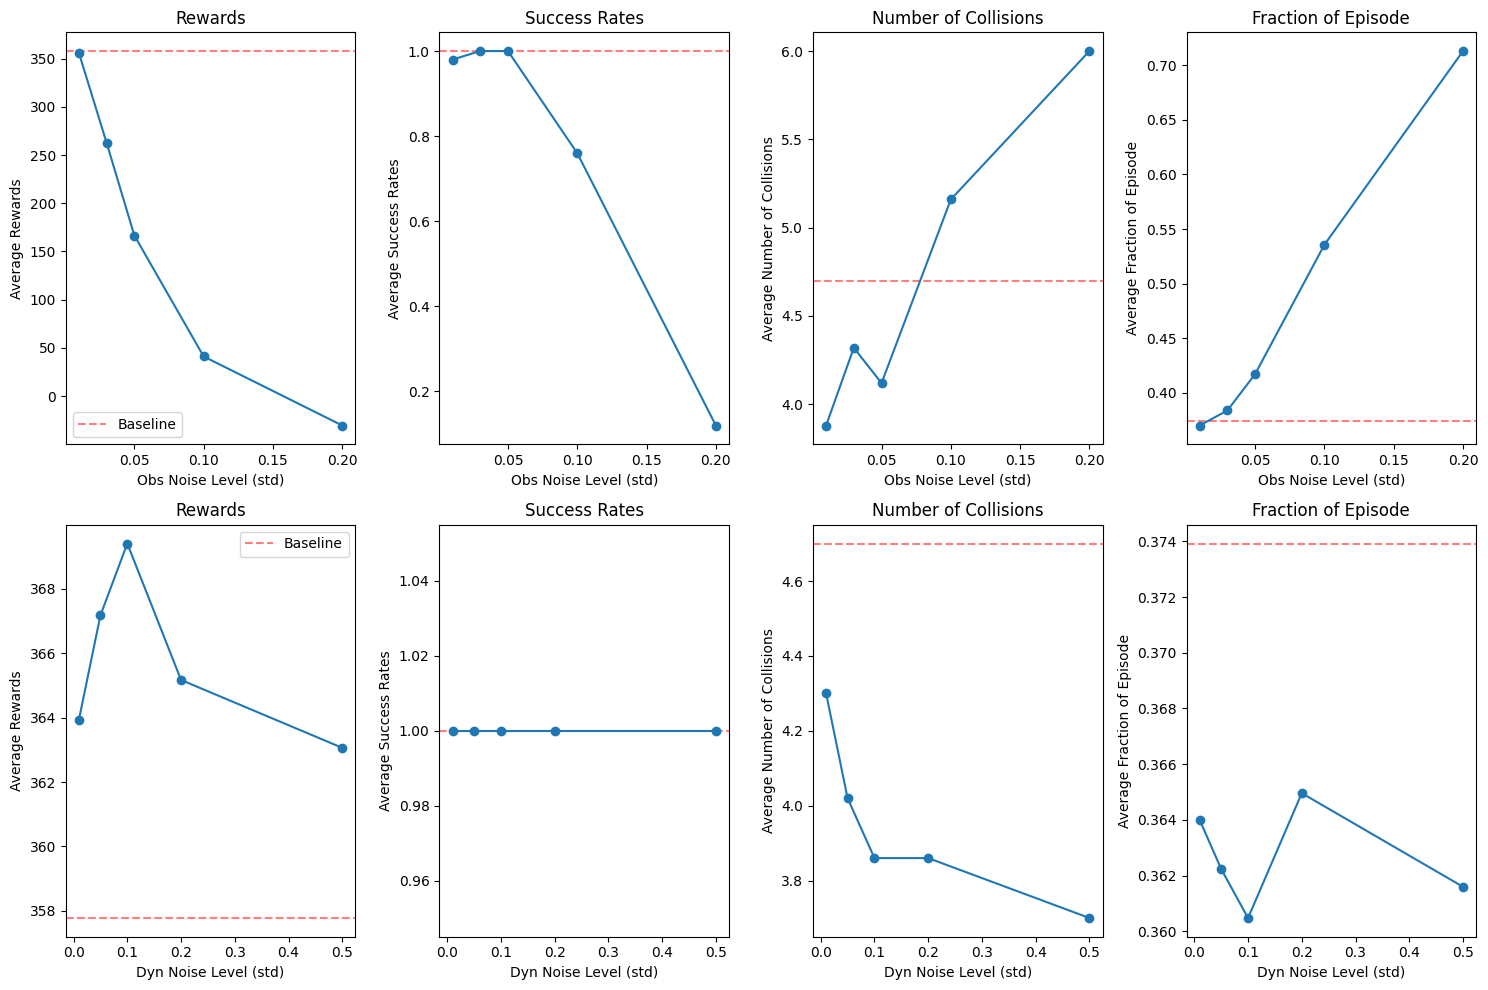

In [13]:
# 5 agents
model_path = "../onpolicy/results/GraphMPE/navigation_graph/rmappo/MAPPO_5/wandb/run-20250312_060957-7h0hpvrb/files"


# Test various noise levels
obs_noise_levels = [0.01, 0.03, 0.05, 0.1, 0.2]
dyn_noise_levels = [0.01, 0.05, 0.1, 0.2, 0.5]

print("Testing observation noise levels...")
obs_results = test_observation_noise_policy(obs_noise_levels, model_path, episodes=50)

print("Testing dynamics noise levels...")
dyn_results = test_dynamics_noise_policy(dyn_noise_levels, model_path, episodes=50)

#run baselines
r, frac, s_rates, n_collisions = eval_pipeline(["--model_dir", model_path, "--env_name", "GraphMPE", \
                                "--render_episodes", "50"])
baseline = {"rewards": r, "success_rates": s_rates, "num_collisions": n_collisions, "frac_episode": frac}

plot_results_policy(obs_results, dyn_results, baseline)


Testing observation noise levels...
__________________________________________________
Using env_name = NoisyGraphMPE
Using model_dir = ../onpolicy/results/GraphMPE/navigation_graph/rmappo/MAPPO_9/wandb/latest-run/files
Using render_episodes = 50
Using save_gifs = False
__________________________________________________
Overriding Observation dimension
Overriding Observation dimension
Restoring from checkpoint stored in ../onpolicy/results/GraphMPE/navigation_graph/rmappo/MAPPO_9/wandb/latest-run/files


/home/ubuntu/marl/RobustMARL/onpolicy/algorithms/graph_mappo.py:53: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  self.scaler = amp.GradScaler()


[522.015780851277, 607.4170473929744, 636.4907013411188, 422.6569127327994, 514.9767820353087, 683.3695922811635, 535.7441749747815, 622.746005724488, 653.7686701147919, 544.6690056167448, 416.8416185715745, 666.3379021563765, 529.3221244781853, 487.7937447382687, 644.9095298187183, 633.9895706625185, 575.3363698645355, 518.4186887483771, 594.3688158105551, 696.2154000376488, 567.7841943877266, 517.4572878899875, 549.3394118728587, 647.8401530684371, 449.7345509731967, 650.6333087494276, 412.28064523550444, 434.15342963240187, 582.9161396699784, 482.7197210219926, 709.149312127744, 495.9116530241454, 552.4390772221669, 619.1313321530118, 516.641660754888, 501.56788115182815, 465.5682150016346, 733.1137008340237, 539.4129246895536, 410.4241876537552, 634.0610436362155, 559.7833329573697, 764.452052095137, 530.0591511191451, 582.3652637044001, 535.320031753165, 619.6323843212895, 642.1711226117475, 570.6127393651825, 438.6500911717785]
[0.45333333333333337, 0.4000000000000001, 0.34666666

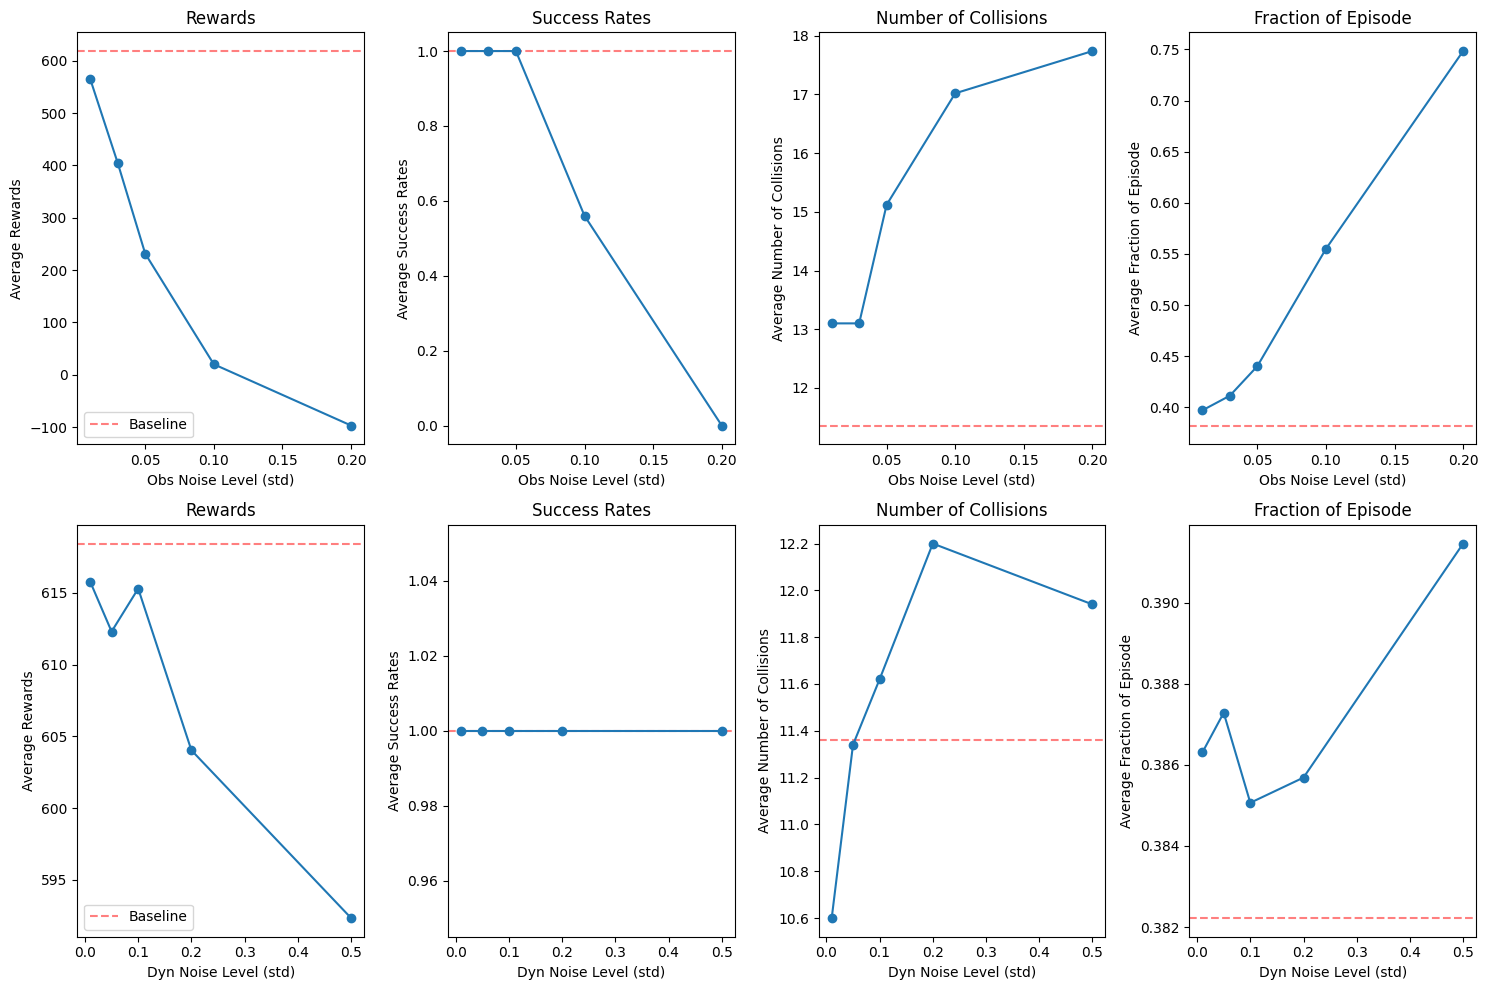

In [15]:
# 9 agents
model_path = "../onpolicy/results/GraphMPE/navigation_graph/rmappo/MAPPO_9/wandb/latest-run/files"

    
# Test various noise levels
obs_noise_levels = [0.01, 0.03, 0.05, 0.1, 0.2]
dyn_noise_levels = [0.01, 0.05, 0.1, 0.2, 0.5]

print("Testing observation noise levels...")
obs_results = test_observation_noise_policy(obs_noise_levels,model_path, episodes=50)

print("Testing dynamics noise levels...")
dyn_results = test_dynamics_noise_policy(dyn_noise_levels, model_path, episodes=50)

#run baselines
r, frac, s_rates, n_collisions = eval_pipeline(["--model_dir", model_path, "--env_name", "GraphMPE", \
                                "--render_episodes", "50"])
baseline = {"rewards": r, "success_rates": s_rates, "num_collisions": n_collisions, "frac_episode": frac}

plot_results_policy(obs_results, dyn_results, baseline, "9 agents")

Testing observation noise levels...
__________________________________________________
Using dyn_noise_level = 0.0
Using env_name = NoisyGraphMPE
Using model_dir = ../onpolicy/results/NoisyGraphMPE/navigation_graph/rmappo/MAPPO_noisyenv_3/wandb/latest-run/files
Using obs_noise_level = 0.01
Using render_episodes = 50
Using save_gifs = False
__________________________________________________


/home/ubuntu/marl/RobustMARL/onpolicy/algorithms/graph_mappo.py:113: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  @torch.cuda.amp.autocast()


Overriding Observation dimension
Overriding Observation dimension
Restoring from checkpoint stored in ../onpolicy/results/NoisyGraphMPE/navigation_graph/rmappo/MAPPO_noisyenv_3/wandb/latest-run/files


/home/ubuntu/marl/RobustMARL/onpolicy/algorithms/graph_mappo.py:53: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  self.scaler = amp.GradScaler()


[256.89966629404694, 191.0293991031189, 238.96704436311106, 189.45380062314334, 247.4698917430777, 195.13200618444876, 177.58046258557897, 249.0280657873835, 174.38635297544894, 269.6246414036193, 185.27520825654446, 200.9987551886512, 180.59347339562214, 273.953727871351, 213.38719707656261, 146.8860574850072, 140.4907594126617, 183.0182800753095, 175.9440012445793, 160.47339682722264, 118.74506738081043, 201.96951461171182, 177.1378001397078, 237.07257893102755, 216.78346195713186, 210.13063485974394, 227.65284780391758, 216.52674259701544, 171.33958758857398, 202.34290378118044, 219.25795238933162, 217.5223998268585, 283.5409572866449, 259.9346076492502, 267.96793776040033, 245.72453657179116, -78.60785865316267, 226.97365575229924, 108.51865474191891, 260.1571827646926, 191.40309198042576, 251.7192595094235, 271.52571091743164, 232.72456940868662, 223.2553117516001, 197.66830815267429, 229.793248443851, 246.3314184391345, 190.7749628382305, 222.23484689354098]
[0.28, 0.44, 0.333333

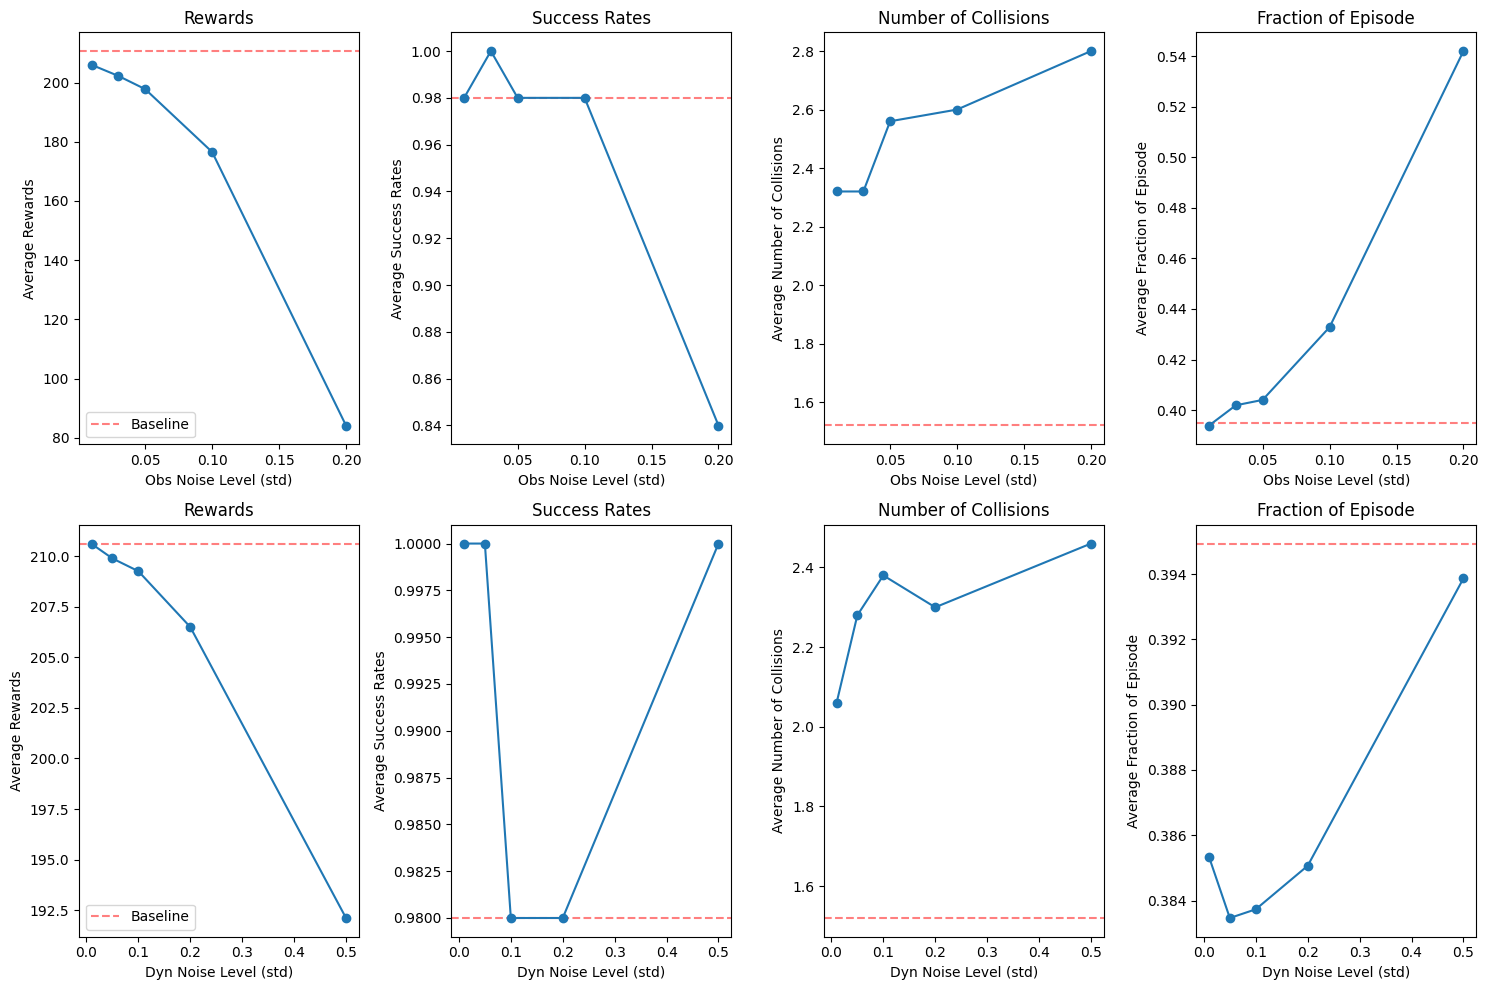

In [3]:
# 3 agents
model_path = "../onpolicy/results/NoisyGraphMPE/navigation_graph/rmappo/MAPPO_noisyenv_3/wandb/latest-run/files"

    
# Test various noise levels
obs_noise_levels = [0.01, 0.03, 0.05, 0.1, 0.2]
dyn_noise_levels = [0.01, 0.05, 0.1, 0.2, 0.5]

print("Testing observation noise levels...")
obs_results = test_observation_noise_policy(obs_noise_levels,model_path, episodes=50)

print("Testing dynamics noise levels...")
dyn_results = test_dynamics_noise_policy(dyn_noise_levels, model_path, episodes=50)

#run baselines
r, frac, s_rates, n_collisions = eval_pipeline(["--model_dir", model_path, "--env_name", "GraphMPE", \
                                "--render_episodes", "50"])
baseline = {"rewards": r, "success_rates": s_rates, "num_collisions": n_collisions, "frac_episode": frac}

plot_results_policy(obs_results, dyn_results, baseline, "3agents")

In [ ]:
# 5 agents
model_path = "../onpolicy/results/NoisyGraphMPE/navigation_graph/rmappo/MAPPO_noisyenv_5/wandb/latest-run/files"

    
# Test various noise levels
obs_noise_levels = [0.01, 0.03, 0.05, 0.1, 0.2]
dyn_noise_levels = [0.01, 0.05, 0.1, 0.2, 0.5]

print("Testing observation noise levels...")
obs_results = test_observation_noise_policy(obs_noise_levels,model_path, episodes=50)

print("Testing dynamics noise levels...")
dyn_results = test_dynamics_noise_policy(dyn_noise_levels, model_path, episodes=50)

#run baselines
r, frac, s_rates, n_collisions = eval_pipeline(["--model_dir", model_path, "--env_name", "GraphMPE", \
                                "--render_episodes", "50"])
baseline = {"rewards": r, "success_rates": s_rates, "num_collisions": n_collisions, "frac_episode": frac}

plot_results_policy(obs_results, dyn_results, baseline, "5agents_noisy")

Testing observation noise levels...
__________________________________________________
Using dyn_noise_level = 0.0
Using env_name = NoisyGraphMPE
Using model_dir = ../onpolicy/results/NoisyGraphMPE/navigation_graph/rmappo/MAPPO_noisyenv_5/wandb/latest-run/files
Using obs_noise_level = 0.01
Using render_episodes = 50
Using save_gifs = False
__________________________________________________
Overriding Observation dimension
Overriding Observation dimension
Restoring from checkpoint stored in ../onpolicy/results/NoisyGraphMPE/navigation_graph/rmappo/MAPPO_noisyenv_5/wandb/latest-run/files


/home/ubuntu/marl/RobustMARL/onpolicy/algorithms/graph_mappo.py:53: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  self.scaler = amp.GradScaler()


[188.5196652404045, 83.47794620987725, 323.72507054478706, 285.84354937447716, 223.98988119015615, 170.16051994507217, 131.5157563962055, 273.3172793911957, 178.23701852734357, 260.75791828711476, 116.84962246645361, 405.45609295834913, 189.5351914131824, 361.9924741119198, 225.28496043678925, 345.575682944017, 208.24635038348916, 131.6758745301051, 203.79898204667643, 287.3687387658078, 291.7851703589589, 336.844693249901, 237.37087594917836, 279.70098613411295, 221.4865013127142, 128.82972831346194, 292.908502870548, 299.6382381742934, 290.7191684143295, 178.9205024900379, 183.56714476539756, 244.05639453187368, 230.463736372362, 324.490611079778, 191.38184189869082, 162.13275457615745, 299.5529493452271, 251.53894449646765, 367.4236890905145, 148.03608600877396, 314.2940710247721, 378.40493133497074, 334.14042778705857, 202.19044032573026, 295.41053872584365, 223.48929982354917, 244.6743602957882, 194.80453456625168, 338.24428803225305, 214.4966454786314]
[0.43999999999999995, 0.656

In [ ]:
# 9 agents
model_path = "../onpolicy/results/NoisyGraphMPE/navigation_graph/rmappo/MAPPO_noisyenv_9/wandb/latest-run/files"

    
# Test various noise levels
obs_noise_levels = [0.01, 0.03, 0.05, 0.1, 0.2]
dyn_noise_levels = [0.01, 0.05, 0.1, 0.2, 0.5]

print("Testing observation noise levels...")
obs_results = test_observation_noise_policy(obs_noise_levels,model_path, episodes=50)

print("Testing dynamics noise levels...")
dyn_results = test_dynamics_noise_policy(dyn_noise_levels, model_path, episodes=50)

#run baselines
r, frac, s_rates, n_collisions = eval_pipeline(["--model_dir", model_path, "--env_name", "GraphMPE", \
                                "--render_episodes", "50"])
baseline = {"rewards": r, "success_rates": s_rates, "num_collisions": n_collisions, "frac_episode": frac}

plot_results_policy(obs_results, dyn_results, baseline, "9agents_noisy")